In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# (B, H, W) 이미지에 대한 차원 표기법
* (배치 사이즈, 높이(세로), 폭(가로))

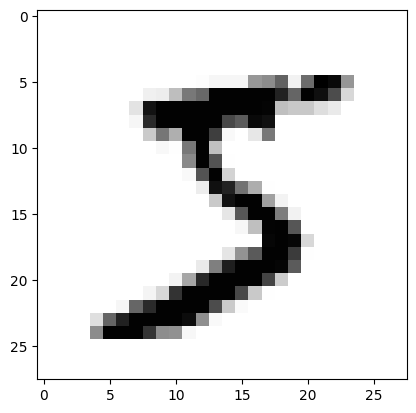

In [2]:
plt.imshow(x_train[0], cmap='Greys')
plt.show()

In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

* 이미지 스케일링(정규화)은 결국 0 ~ 255이기 때문에 255로 나누어 주면 된다.
* 은닉층의 노드 수는 2의 제곱수를 사용
* sparse_categorical_crossentropy는 원핫인코딩도 자동으로 해줌
* 이진분류일 때는 binary_crossentropy해야 함

In [4]:
from tensorflow.keras.layers import Input, Flatten, Dense

x_train, x_test = x_train / 255, x_test / 255

inputs = Input(shape=(28, 28))
x = Flatten()(inputs)
x = Dense(256, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 881us/step - loss: 0.2262 - accuracy: 0.9337
Epoch 2/10
1875/1875 [==============================] - 2s 867us/step - loss: 0.0917 - accuracy: 0.9721
Epoch 3/10
1875/1875 [==============================] - 2s 886us/step - loss: 0.0618 - accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 2s 908us/step - loss: 0.0439 - accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 2s 882us/step - loss: 0.0324 - accuracy: 0.9899
Epoch 6/10
1875/1875 [==============================] - 2s 879us/step - loss: 0.0248 - accuracy: 0.9924
Epoch 7/10
1875/1875 [==============================] - 2s 902us/step - loss: 0.0203 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 2s 886us/step - loss: 0.0163 - accuracy: 0.9949
Epoch 9/10
1875/1875 [==============================] - 2s 902us/step - loss: 0.0141 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 2s 884u

In [7]:
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('loss: ', eval_loss, 'acc: ', eval_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0926 - accuracy: 0.9775
loss:  0.09256531298160553 acc:  0.9775000214576721


* 배치 경사 하강법
* 확률적 경사 하강법 - 부분 극소점(local minimum)에 빠질 위험
* 미니 배치 경사 하강법 - 디폴트가 32(낮음), 보통 128~256 / 배치가 작을 경우, 확률적 경사 하강법과 비슷해짐

In [8]:
from tensorflow.keras.layers import Input, Flatten, Dense

# x_train, x_test = x_train / 255, x_test / 255

inputs = Input(shape=(28, 28))
x = Flatten()(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 59,210
Trainable params: 59,210
Non-trainable

# 아주 간단
* validation_split=  알아서 검증셋 만들어줌, 매 epoch마다 k겹교차검증처럼 해줌

In [10]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0129 - accuracy: 0.9961 - val_loss: 0.1024 - val_accuracy: 0.9762
Epoch 2/10
375/375 [==============================] - 1s 1ms/step - loss: 0.0063 - accuracy: 0.9985 - val_loss: 0.1063 - val_accuracy: 0.9767
Epoch 3/10
375/375 [==============================] - 1s 1ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.1103 - val_accuracy: 0.9753
Epoch 4/10
375/375 [==============================] - 1s 1ms/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 0.1132 - val_accuracy: 0.9753
Epoch 5/10
375/375 [==============================] - 1s 1ms/step - loss: 0.0023 - accuracy: 0.9998 - val_loss: 0.1202 - val_accuracy: 0.9751
Epoch 6/10
375/375 [==============================] - 1s 1ms/step - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.1258 - val_accuracy: 0.9753
Epoch 7/10
375/375 [==============================] - 1s 1ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.1328 - val_accuracy: 0.9744
Epoch 

- loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.1483 - val_accuracy: 0.9723   
과적합

* <h2>드롭아웃</h2>  과대적합을 완화하기 위해

In [11]:
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

# x_train, x_test = x_train / 255, x_test / 255

inputs = Input(shape=(28, 28))
x = Flatten()(inputs)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 64)                4160

In [12]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.6865 - accuracy: 0.7813 - val_loss: 0.2184 - val_accuracy: 0.9330
Epoch 2/10
375/375 [==============================] - 1s 1ms/step - loss: 0.2981 - accuracy: 0.9123 - val_loss: 0.1712 - val_accuracy: 0.9488
Epoch 3/10
375/375 [==============================] - 1s 1ms/step - loss: 0.2396 - accuracy: 0.9301 - val_loss: 0.1389 - val_accuracy: 0.9591
Epoch 4/10
375/375 [==============================] - 1s 1ms/step - loss: 0.2028 - accuracy: 0.9400 - val_loss: 0.1278 - val_accuracy: 0.9633
Epoch 5/10
375/375 [==============================] - 0s 1ms/step - loss: 0.1808 - accuracy: 0.9475 - val_loss: 0.1218 - val_accuracy: 0.9647
Epoch 6/10
375/375 [==============================] - 0s 1ms/step - loss: 0.1616 - accuracy: 0.9525 - val_loss: 0.1167 - val_accuracy: 0.9673
Epoch 7/10
375/375 [==============================] - 1s 1ms/step - loss: 0.1522 - accuracy: 0.9547 - val_loss: 0.1110 - val_accuracy: 0.9676
Epoch 

- loss: 0.1256 - accuracy: 0.9625 - val_loss: 0.1051 - val_accuracy: 0.9716   
loss와 val_loss가 <u>비슷함</u> **good**

- 자동으로 val_loss를 보고 과대적합을 막기 위해 epoch을 끊는 방법
- monitor - 무엇을 보고 할 것인지 / patience 최고 기록에서 넘어가는 epoch을 몇 개까지로 정할 것인가
- restore_best_weights=True 꼭 

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

stopper = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[stopper], verbose=2)

Epoch 1/20
375/375 - 1s - loss: 0.0658 - accuracy: 0.9792 - val_loss: 0.0954 - val_accuracy: 0.9750 - 609ms/epoch - 2ms/step
Epoch 2/20
375/375 - 0s - loss: 0.0640 - accuracy: 0.9805 - val_loss: 0.0952 - val_accuracy: 0.9752 - 456ms/epoch - 1ms/step
Epoch 3/20
375/375 - 0s - loss: 0.0634 - accuracy: 0.9804 - val_loss: 0.0978 - val_accuracy: 0.9738 - 451ms/epoch - 1ms/step
Epoch 4/20
375/375 - 0s - loss: 0.0623 - accuracy: 0.9809 - val_loss: 0.0956 - val_accuracy: 0.9761 - 445ms/epoch - 1ms/step
Epoch 5/20
375/375 - 0s - loss: 0.0598 - accuracy: 0.9815 - val_loss: 0.0956 - val_accuracy: 0.9747 - 450ms/epoch - 1ms/step
Epoch 6/20
375/375 - 0s - loss: 0.0580 - accuracy: 0.9814 - val_loss: 0.0909 - val_accuracy: 0.9769 - 454ms/epoch - 1ms/step
Epoch 7/20
375/375 - 0s - loss: 0.0585 - accuracy: 0.9819 - val_loss: 0.0969 - val_accuracy: 0.9757 - 462ms/epoch - 1ms/step
Epoch 8/20
375/375 - 0s - loss: 0.0592 - accuracy: 0.9814 - val_loss: 0.0959 - val_accuracy: 0.9756 - 458ms/epoch - 1ms/step
